In [3]:
from ta_analyzer_core import tamatrix_importer, load_spectra, polyfit, plot_contour, glotaran, glotaran_output, batch_load_glotaran, load_glotaran
import matplotlib.pyplot as plt

#Uncomment following if you want to use the script from other folder
# import sys
# import os
# # Add the parent directory to sys.path
# sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

# try:
#     # Import from the TA_analyzer folder
#     from TA_Analyzer.ta_analyzer_core import tamatrix_importer, load_spectra, polyfit, plot_contour, glotaran, glotaran_output

#     print("Load from TA_Analyzer folder")
# except ImportError:
#     from ta_analyzer_core import tamatrix_importer, load_spectra, polyfit, plot_contour, glotaran, glotaran_output

#     print("Load from current folder")



# Load TA Matrix

The number of time points taken as background: 25


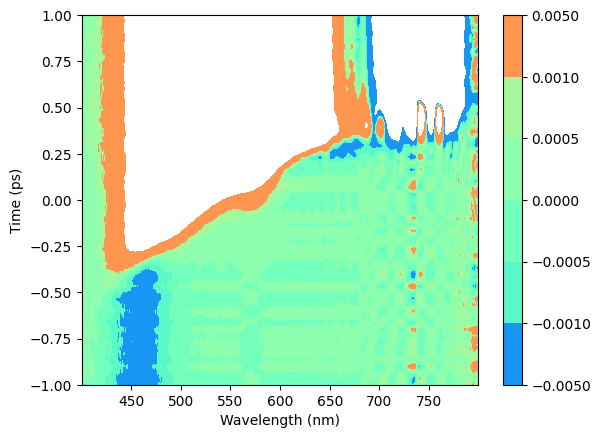

In [2]:
tamatrix = tamatrix_importer(filename='data/NIR800',startnm=400,endnm=800) 
tamatrix_bgcorr = tamatrix.auto_bgcorr(25)

# Automatic zero time correction

Fitting: 100%|██████████| 945/945 [00:09<00:00, 98.77it/s] 

Parameters([('a', <Parameter 'a', value=-252862.27008949927, bounds=[-inf:inf]>), ('b', <Parameter 'b', value=1.0, bounds=[-inf:inf]>), ('c', <Parameter 'c', value=0.9367441384612823, bounds=[-inf:inf]>)])


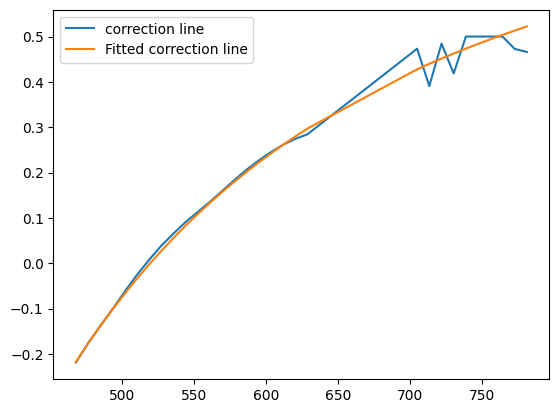

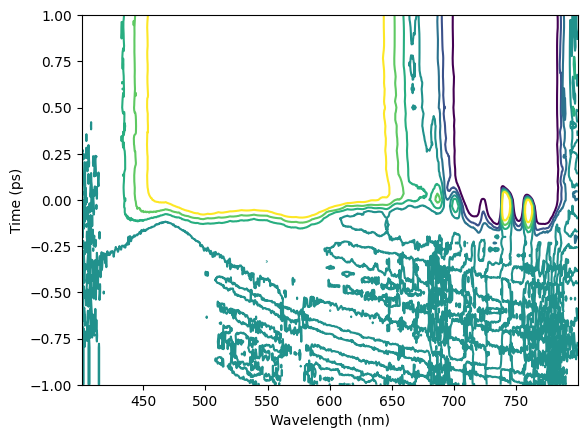

In [3]:
tamatrix.fit_correlation(3)
# manual plot
# line = tamatrix.t0_list
# fit = polyfit(line[1],line[0],line[2]) 
# plt.plot(line[0],line[1])
# plt.plot(line[0],fit)
# plt.legend(['correction line','fitted correction line'])
tamatrix_tcorr = tamatrix.auto_tcorr_fit()

# Correct zero time with manually drew line

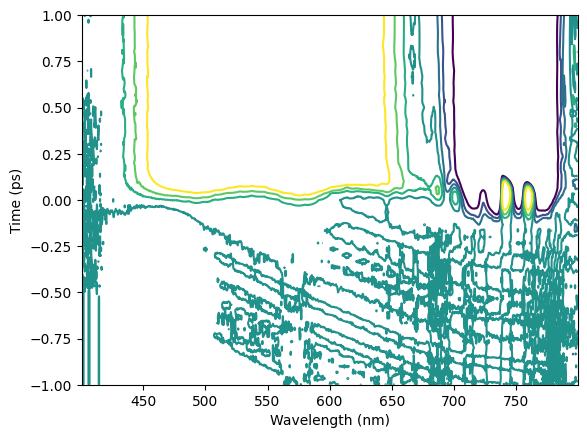

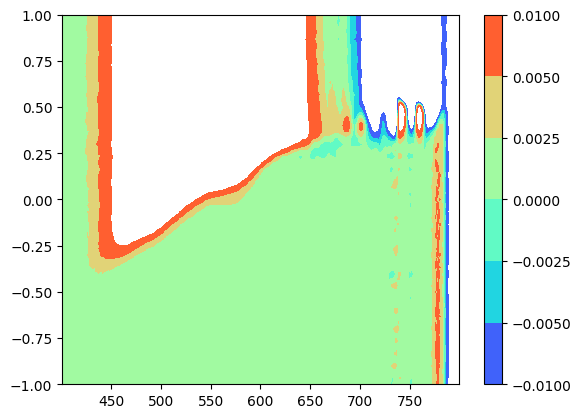

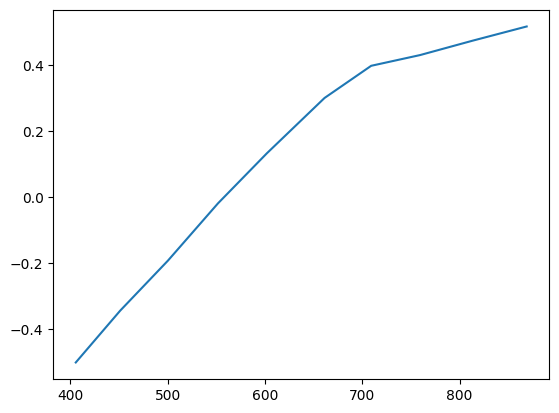

In [3]:
# Draw the line with correction_line.py
tamatrix.auto_tcorr('data/NIR800_line')
plt.show()
plot_contour(tamatrix.tatime,tamatrix.tawavelength,tamatrix.tamatrix,max_point=1)
plt.plot(tamatrix.zerotime_x,tamatrix.zerotime_y)


# Save corrected matrix, tatime0 and tawavelength0

In [4]:
tamatrix.save_all()
# tamatrix.save_tatime()    # Save the time axis
# tamatrix.save_tawavelength()  # Save the wavelength axis

NIR800_tawavelength has been saved

NIR800_tatime has been saved

NIR800_tamatrix has been saved



# Plot TA spectra and traces

c:\Users\kentc\OneDrive - University of Rochester\Documents\Lab\Exp\TA\TA_Analyzer\ta_analyzer_core.py:1478: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\kentc\OneDrive - University of Rochester\Documents\Lab\Exp\TA\TA_Analyzer\ta_analyzer_core.py:1625: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


[array([-1.17616000e-04, -1.18340294e-04, -8.78770336e-05,  5.24126339e-05,
         1.14145468e-04, -4.17552951e-05,  5.92937646e-05,  3.79776172e-05,
        -1.30401649e-05, -1.79473813e-05,  1.99096012e-05, -7.90458175e-05,
         6.34330007e-05,  7.00717483e-05, -8.51957458e-05, -1.20796706e-04,
        -1.44903355e-05,  1.27840267e-04, -1.33243206e-04, -1.55494764e-04,
        -9.09510986e-05, -8.19333654e-06,  1.48984089e-04,  1.70969670e-04,
         8.77801614e-05,  1.13669781e-04,  2.50741779e-04,  3.05248298e-04,
         6.66511752e-04,  9.30692007e-04,  1.68389940e-03,  4.13259461e-03,
         1.03211913e-02,  2.35885238e-02,  4.24820901e-02,  6.13424387e-02,
         7.38323549e-02,  7.99667477e-02,  8.15648097e-02,  8.23686238e-02,
         8.35448804e-02,  8.25538411e-02,  8.16413005e-02,  8.24678200e-02,
         8.22048622e-02,  8.20475406e-02,  8.25988871e-02,  8.31989287e-02,
         8.35550827e-02,  8.32208501e-02,  8.23241302e-02,  8.24867995e-02,
         8.2

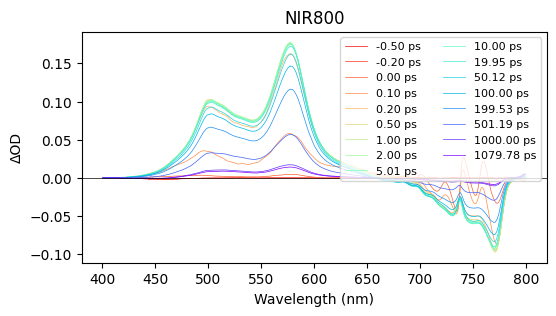

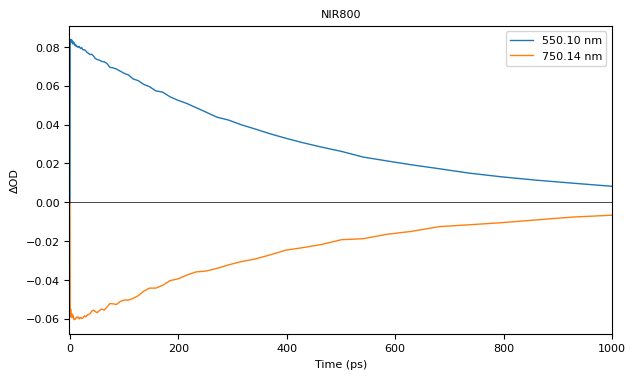

In [5]:
tamatrix.auto_taspectra()
tamatrix.auto_takinetics(wavelength_pts=[550,750],tmax=1000)

# Generate glotaran input file

In [6]:
glotaran_input = glotaran("data/NIR800_tcorr", "data/NIR800_tatime","data/NIR800_tawavelength")
# Or use the function in tamatrix_importer class
glotaran_input = tamatrix.glotaran(mat='tcorr')

# Load Glotaran output files
To use this function, save the DAS as "filename_DAS.ascii", the DAS traces as "filename_traces.ascii", and the summary file as "filename_summary.txt". To use plot_trace_fit function, the glotaran input file "filename.ascii" has to be present. 

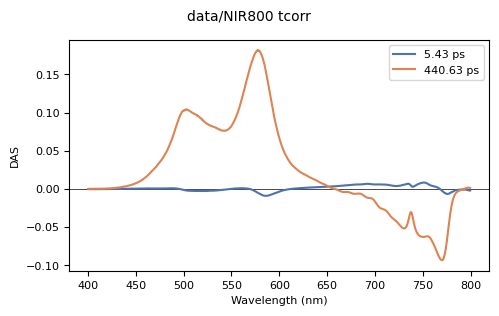

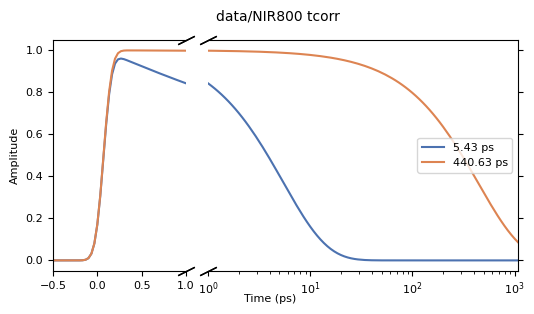

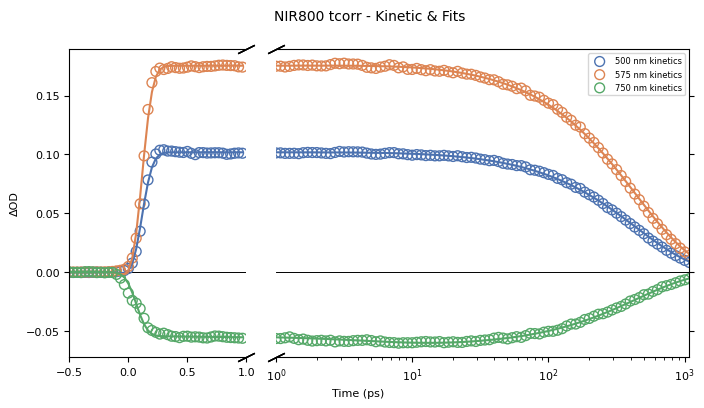

In [ ]:
nir800_glotaran_output = glotaran_output("data/NIR800_tcorr")
nir800_glotaran_output.plot_das()
nir800_glotaran_output.plot_trace_fit(wavelength_select=[500,575,750],tmax=1000)

# Load glotaran input file
Load glotaran input file and plot TA spectra. It's possible to batch process.


c:\Users\kentc\OneDrive - University of Rochester\Documents\Lab\Exp\TA\TA_Analyzer\ta_analyzer_core.py:1479: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


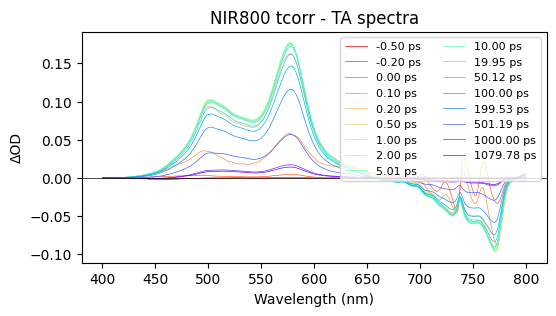

In [2]:
matrix_from_glotaran = tamatrix_importer(load_glotaran=load_glotaran('data/NIR800_tcorr.ascii'))
# Or use batch_load_glotaran function to load all glotaran files in a directory. Make sure all ascii files are Glotaran input files.
# batch_load_glotaran(dir = 'data/')
spectra_set, time_index = matrix_from_glotaran.auto_taspectra()


# load raw tamatrix and display time trace

c:\Users\kentc\OneDrive - University of Rochester\Documents\Lab\Exp\TA\TA_Analyzer\ta_analyzer_core.py:247: RuntimeWarning: divide by zero encountered in log
  np.log(self.tatime), self.trace_avg, label=f"{wavelength} nm trace"
c:\Users\kentc\OneDrive - University of Rochester\Documents\Lab\Exp\TA\TA_Analyzer\ta_analyzer_core.py:247: RuntimeWarning: invalid value encountered in log
  np.log(self.tatime), self.trace_avg, label=f"{wavelength} nm trace"


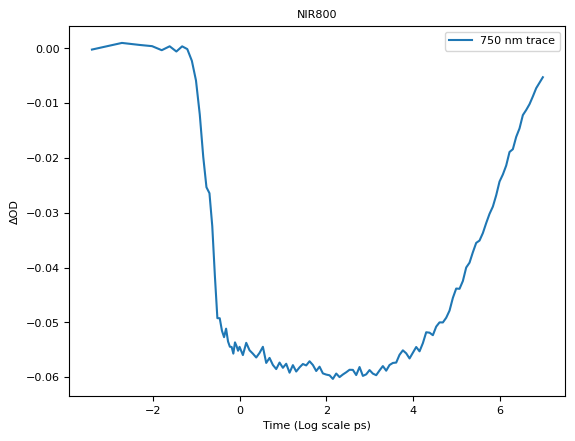

In [8]:
#ptca_nio_ito_80nj.get_1ps()
NIR800 = load_spectra('data/NIR800',num_spec=1)

k_NIR800_800nm = NIR800.get_traces(750)